In [6]:
import os
import sys
sys.path.append('/Users/david/Desktop/FinetuneEmbed')
# sys.path.append('/afs/crc.nd.edu/group/StatDataMine/dm011/Dailin_Gan/FinetuneEmbed')

# Specify the working directory
os.chdir('/Users/david/Desktop/FinetuneEmbed')
# os.chdir('/afs/crc.nd.edu/group/StatDataMine/dm011/Dailin_Gan/FinetuneEmbed')
import pickle

with open("./res/2025_0528/Gene_Text/biobert-base-cased-v1.1/LongShortTF/ROC_curve_41.pkl", "rb") as f:
    roc_data = pickle.load(f)
print(roc_data)

{'fpr': {1: array([0.        , 0.07692308, 0.07692308, 0.23076923, 0.23076923,
       0.46153846, 0.46153846, 0.69230769, 0.69230769, 0.84615385,
       0.84615385, 1.        ])}, 'tpr': {1: array([0. , 0. , 0.2, 0.2, 0.4, 0.4, 0.6, 0.6, 0.8, 0.8, 1. , 1. ])}, 'labels': array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0])}


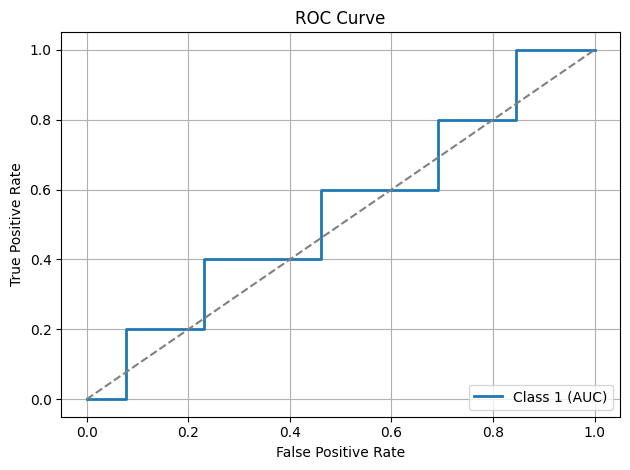

In [7]:
import matplotlib.pyplot as plt
fpr = roc_data["fpr"][1]
tpr = roc_data["tpr"][1]

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Class 1 (AUC)', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:

y_test_bin = roc_data['y_test_bin']
y_test_proba = roc_data['y_test_proba']
classes = roc_data['classes']

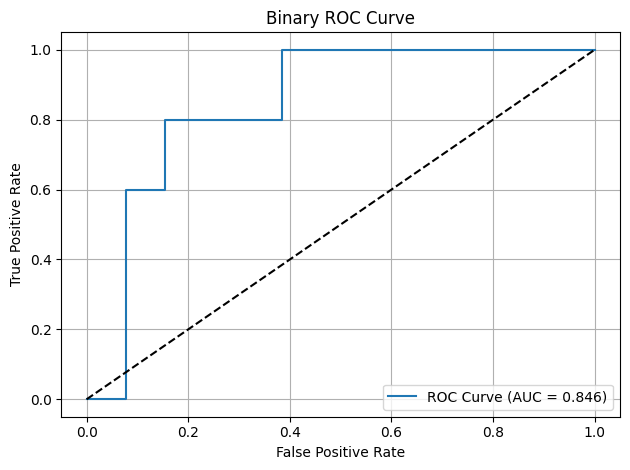

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

n_classes = len(classes)

# Multi-class case
if isinstance(y_test_bin, np.ndarray) and y_test_bin.ndim > 1:
    plt.figure()
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {classes[i]} (AUC = {roc_auc:.3f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Multi-class ROC Curve")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Binary case
else:
    fpr, tpr, _ = roc_curve(y_test_bin, y_test_proba[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Binary ROC Curve")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()